In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
params = np.array([alpha_h_I,beta_h_I])

In [3]:
def Vc_Model_I(R,parameters,rho_b=rho_b_I,rho_h=rho_h_I,a_h=a_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    alpha_h,beta_h = parameters
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [4]:
R = np.linspace(0.,15.,100)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


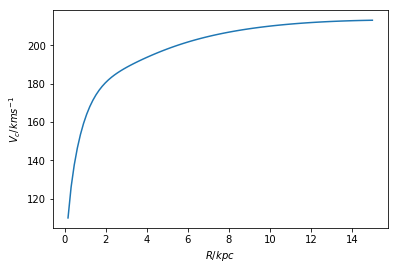

In [5]:
plt.plot(R,Vc_Model_I(R,params))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [6]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=220.# local circular velocity (km/s)
UsunINUSE=10.3#11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=15.3#12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.7#07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [7]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [8]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [9]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  220.0  km/s
 (Usun,Vsun,Wsun) = ( 10.3 , 15.3 , 7.7 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                           0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [10]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [11]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [12]:
print min(vecvRp),max(vecvRp),min(vecRp),max(vecRp)

128.218523307317 386.01829276368164 3.4805916598031352 17.55446098248422


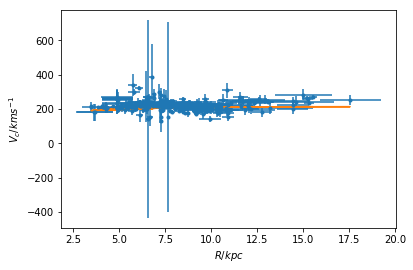

In [13]:
plt.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
plt.plot(vecRp,Vc_Model_I(vecRp,params))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


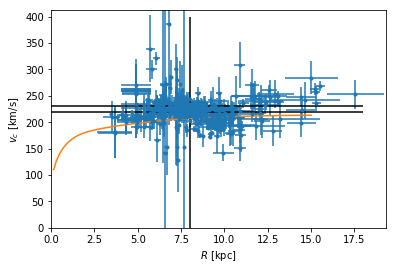

In [15]:
fig, ax1 = plt.subplots()
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')
plt.plot(R,Vc_Model_I(R,params))
plt.hlines(230, 0., 18.)
plt.hlines(220,0,18)
plt.vlines(8,0,400)
plt.show()

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


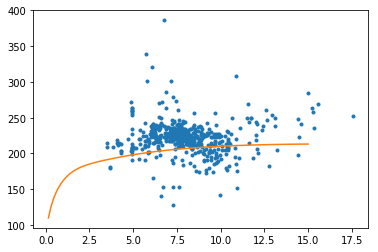

In [16]:
plt.plot(vecRp,vecvRp,'.')
plt.plot(R,Vc_Model_I(R,params))

In [15]:
def Xi2(parameters):
    alpha_h,beta_h = parameters
    model = Vc_Model_I(vecRp,parameters)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [16]:
print Xi2(params)

7142.2492346595245


In [17]:
from scipy.optimize import minimize

In [18]:
alpha_h_II =1.63 
beta_h_II = 2.17
print params

[-2.    2.96]


In [19]:
x0 = np.array([-3.0,1.0])

In [20]:
LS = minimize(Xi2,x0,method='L-BFGS-B',bounds=((-3.,3.),(1.,4.),))

In [21]:
print LS

      fun: 2016.064295343203
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01755325, -0.02246452])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 66
      nit: 16
   status: 0
  success: True
        x: array([-0.3297626 ,  3.72998096])


In [23]:
#L2 = minimize(Xi2,x0, method='TNC',bounds=((-3.,3.),(1.,4.),))

In [24]:
#print L2

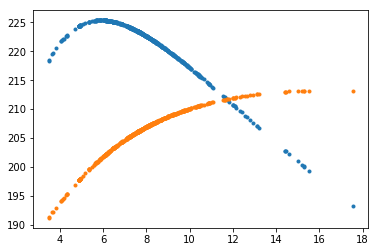

In [26]:
plt.plot(vecRp,Vc_Model_I(vecRp,LS.x),'.')
plt.plot(vecRp,Vc_Model_I(vecRp,params),'.')

# $\rho_{h}$ y $\rho_{b}$

In [27]:
def Vc_Model_I_v2(R,parameters,alpha_h=alpha_h_I,beta_h=beta_h_I,a_h=a_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    rho_b,rho_h = parameters
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [28]:
params_v1 = np.array([rho_b_I,rho_h_I])

In [57]:
def Xi2_v1(parameters):
    rho_b,rho_h = np.exp(parameters)
    model = Vc_Model_I_v2(vecRp,np.exp(parameters))
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [54]:
y,h=np.log(params_v1)
print y,h

19.8722945711929 20.382182987767514


In [58]:
print Xi2_v1(np.log(params_v1))

7142.24923465953


In [50]:
print params_v1,np.log(params_v1)

[4.27e+08 7.11e+08] [19.87229457 20.38218299]


In [59]:
LS_v1 = minimize(Xi2,x0,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(30.0e8)),(np.log(1.0e8),np.log(20.0e8)),))

In [60]:
print LS_v1

      fun: 2.3228855146984913e+133
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.02484616e+141,  1.03268367e+142])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 9
      nit: 1
   status: 0
  success: True
        x: array([18.42068074, 18.42068074])


In [61]:
print np.exp(LS_v1.x)

[1.e+08 1.e+08]


# $R_{d}$  y $a_{h}$

In [63]:
def Vc_Model_I_v3(R,parameters,alpha_h=alpha_h_I,beta_h=beta_h_I,rho_h=rho_h_I,rho_b=rho_b_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    a_h,R_d = parameters
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [64]:
params_v3 = np.array([a_h_I,R_d_I])

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


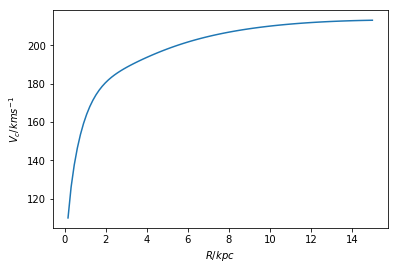

In [66]:
plt.plot(R,Vc_Model_I_v3(R,params_v3))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [67]:
def Xi2_v3(parameters):
    a_h,R_d = parameters
    model = Vc_Model_I_v3(vecRp,parameters)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [68]:
print Xi2_v3(params_v3)

7142.2492346595245


In [72]:
LS_v3 = minimize(Xi2,x0,method='L-BFGS-B',bounds=((0.1,9.),(1.,9.),))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


In [73]:
print LS_v3

      fun: 2156.532541554548
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.78341985e+02, -1.81898940e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 123
      nit: 28
   status: 0
  success: True
        x: array([0.1       , 4.14235183])


# $R_{d}$ y $\alpha_{h}$

In [ ]:
def Vc_Model_I_v4(R,parameters,a_h=a_h_I,beta_h=beta_h_I,rho_h=rho_h_I,rho_b=rho_b_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    R_d,alpha_h = parameters
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [ ]:
#Grid
R_d_test = np.linspace(1.,4.,10)
Sigma_d_test = np.linspace(0.1e9,3.0e9,10)

In [ ]:
#g=np.meshgrid(R_d_test,Sigma_d_test)
#np.shape(g)

In [ ]:
#matrix = []
#for i in range(len(R_d_test)):
#    row=[]
#    for j in range(len(Sigma_d_test)):
#        row.append(Sigma_d_test[j])
#        matrix.append(row)
#print np.shape(matrix)

In [ ]:
def Vc_Model_I_grid(R,parameters,rho_b=rho_b_I,alpha_h=alpha_h_I,beta_h=beta_h_I,rho_h=rho_h_I,a_h=a_h_I,Sigma_g_ISM=Sigma_g_ISM_I):
    R_d,Sigma_d_SD = parameters
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [ ]:
def Xi2_grid(parameters):
    R_d,Sigma_d_SD = parameters
    model = Vc_Model_I_grid(vecRp,parameters)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [ ]:
Xi_grid = []
for i in range(len(R_d_test)):
    for j in range(len(Sigma_d_test)):
        param=np.array([R_d_test[i],Sigma_d_test[j]])
        Xi_grid.append(Xi2_grid(param))
print Xi_grid

In [ ]:
min(Xi_grid),max(Xi_grid)

In [ ]:
#np.std(Xi_grid)

In [ ]:
Xi_grid.index(min(Xi_grid))